In [ ]:
%pip install missingno

In [ ]:
%pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=536d5164eed77138137185e58d452c5ff75c0df06e643616eeb9a9434fe32824
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    

In [ ]:
import missingno as msno
from ydata_profiling import ProfileReport

In [ ]:
from sklearn.preprocessing import LabelEncoder # convierte el texto a numeros
from sklearn.svm import SVC #maquina soporte vectorial
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump, load

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/datasets_pandas_scikit_learn_spark-master/Glioblastoma (TCGA, Nature 2008).csv', sep=',', header=0)
df.head()

,ACGH Data,Cancer Type,CNA,Complete Data,Disease Free (Months),Disease Free Status,ICD-10 Classification,Karnofsky Performance Score,MRNA Data,Mutation Count,Overall Survival (Months),Overall Survival Status,Person Gender,Pre-treatment History,Prior Glioma,Sample Type,Sequenced,Treatment Status
0,YES,Glioblastoma Multiforme,0.246,YES,4.5,Recurred,NaN,80.0,YES,3.0,11.6,DECEASED,FEMALE,YES,NO,Primary,YES,Untreated
1,YES,Glioblastoma Multiforme,0.148,YES,1.32,Recurred,NaN,100.0,YES,5.0,4.73,DECEASED,MALE,NO,NO,Primary,YES,Untreated
2,NO,Glioblastoma Multiforme,NaN,NO,10.3,Recurred,NaN,80.0,YES,NaN,11.3,DECEASED,MALE,NO,NO,Primary,YES,Untreated
3,YES,Glioblastoma Multiforme,0.239,YES,9.93,Recurred,NaN,80.0,YES,0.0,18.3,DECEASED,FEMALE,NO,NO,Primary,YES,Untreated
4,YES,Glioblastoma Multiforme,0.193,YES,17,Recurred,NaN,80.0,YES,4.0,23.2,DECEASED,FEMALE,YES,NO,Primary,YES,Treated


In [ ]:
df.dtypes

ACGH Data                       object
Cancer Type                     object
CNA                             object
Complete Data                   object
Disease Free (Months)           object
Disease Free Status             object
ICD-10 Classification          float64
Karnofsky Performance Score    float64
MRNA Data                       object
Mutation Count                 float64
Overall Survival (Months)       object
Overall Survival Status         object
Person Gender                   object
Pre-treatment History           object
Prior Glioma                    object
Sample Type                     object
Sequenced                       object
Treatment Status                object
dtype: object

In [ ]:
columnsNumerics = ['CNA','Disease Free (Months)','Overall Survival (Months)']

In [ ]:
for columna in df[columnsNumerics]:
    print(columna)
    dfp = pd.to_numeric(df[columna], errors="coerce")
    ix_pos = dfp.isna()
    print(df[ix_pos])
    print()

CNA
    ACGH Data              Cancer Type  CNA Complete Data  \
2          NO  Glioblastoma Multiforme  NaN            NO   
39        YES                                               
81         NO  Glioblastoma Multiforme  NaN            NO   
91        YES  Glioblastoma Multiforme                YES   
108        NO  Glioblastoma Multiforme  NaN            NO   
154       YES  Glioblastoma Multiforme    .            NO   
177        NO  Glioblastoma Multiforme  NaN            NO   
178        NO  Glioblastoma Multiforme  NaN            NO   
181        NO  Glioblastoma Multiforme  NaN            NO   
188        NO  Glioblastoma Multiforme  NaN            NO   
196        NO  Glioblastoma Multiforme  NaN            NO   

    Disease Free (Months) Disease Free Status  ICD-10 Classification  \
2                    10.3            Recurred                    NaN   
39                     11            Recurred                    NaN   
81                  0.427            Recurred  

In [ ]:
hp = {"CNA": {"NaN":0,".":0," ":0}}
df = df.replace(hp)
df["CNA"] = pd.to_numeric(df["CNA"])

hp = {"Disease Free (Months)": {"NaN":0,".":0," ":0}}
df = df.replace(hp)
df["Disease Free (Months)"] = pd.to_numeric(df["Disease Free (Months)"])

hp = {"Overall Survival (Months)": {". ":0," ":0}}
df = df.replace(hp)
df["Overall Survival (Months)"] = pd.to_numeric(df["Overall Survival (Months)"])

# hp = {"Mutation Count": {"*":0}}
# df = df.replace(hp)

hp = {"Cancer Type": {" ":None}}
df = df.replace(hp)

hp = {"Complete Data": {" ":None}}
df = df.replace(hp)

hp = {"Pre-treatment History": {" ":None}}
df = df.replace(hp)

hp = {"Prior Glioma": {" ":None}}
df = df.replace(hp)

hp = {"Sample Type": {" ":None}}
df = df.replace(hp)

hp = {"Treatment Status": {" ":None}}
df = df.replace(hp)

In [ ]:
df.dtypes

ACGH Data                       object
Cancer Type                     object
CNA                            float64
Complete Data                   object
Disease Free (Months)          float64
Disease Free Status             object
ICD-10 Classification          float64
Karnofsky Performance Score    float64
MRNA Data                       object
Mutation Count                 float64
Overall Survival (Months)      float64
Overall Survival Status         object
Person Gender                   object
Pre-treatment History           object
Prior Glioma                    object
Sample Type                     object
Sequenced                       object
Treatment Status                object
dtype: object

<Axes: >

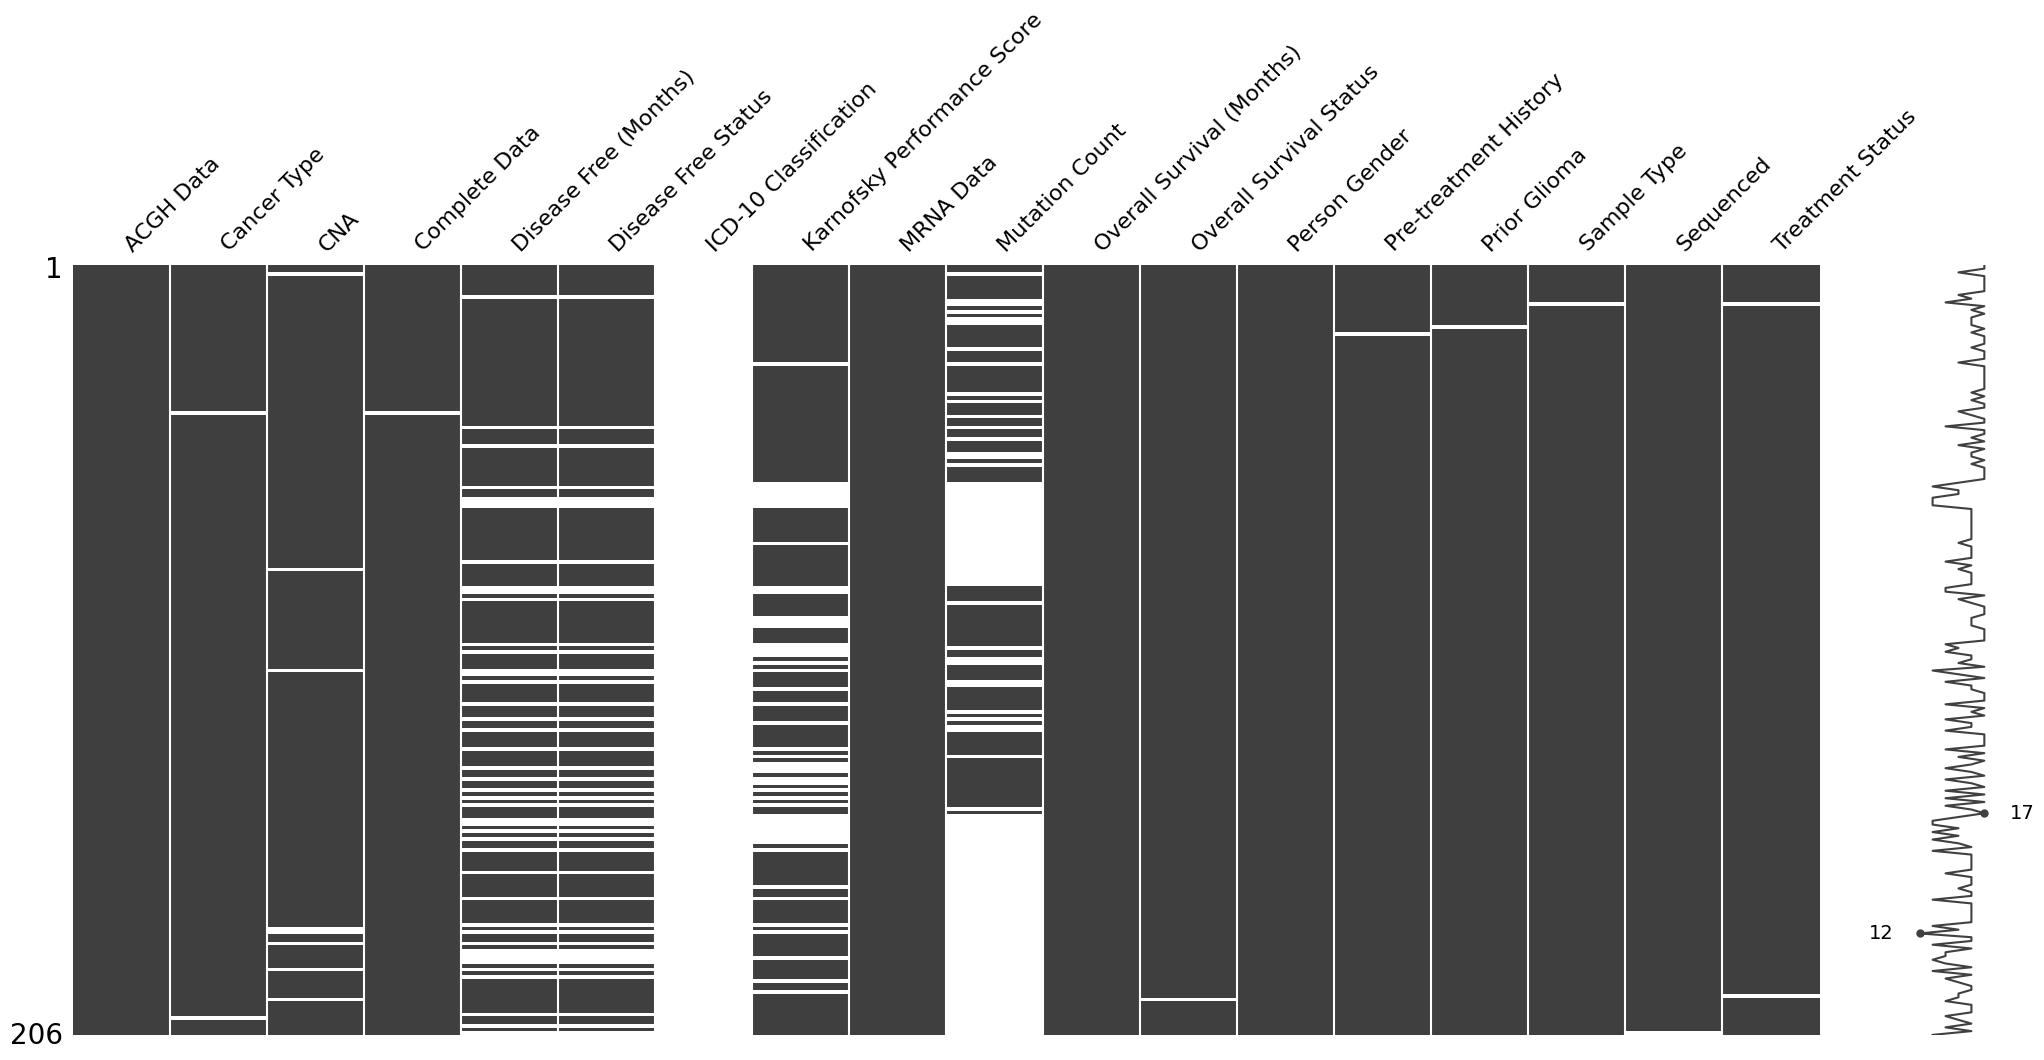

In [ ]:
msno.matrix(df)

<Axes: >

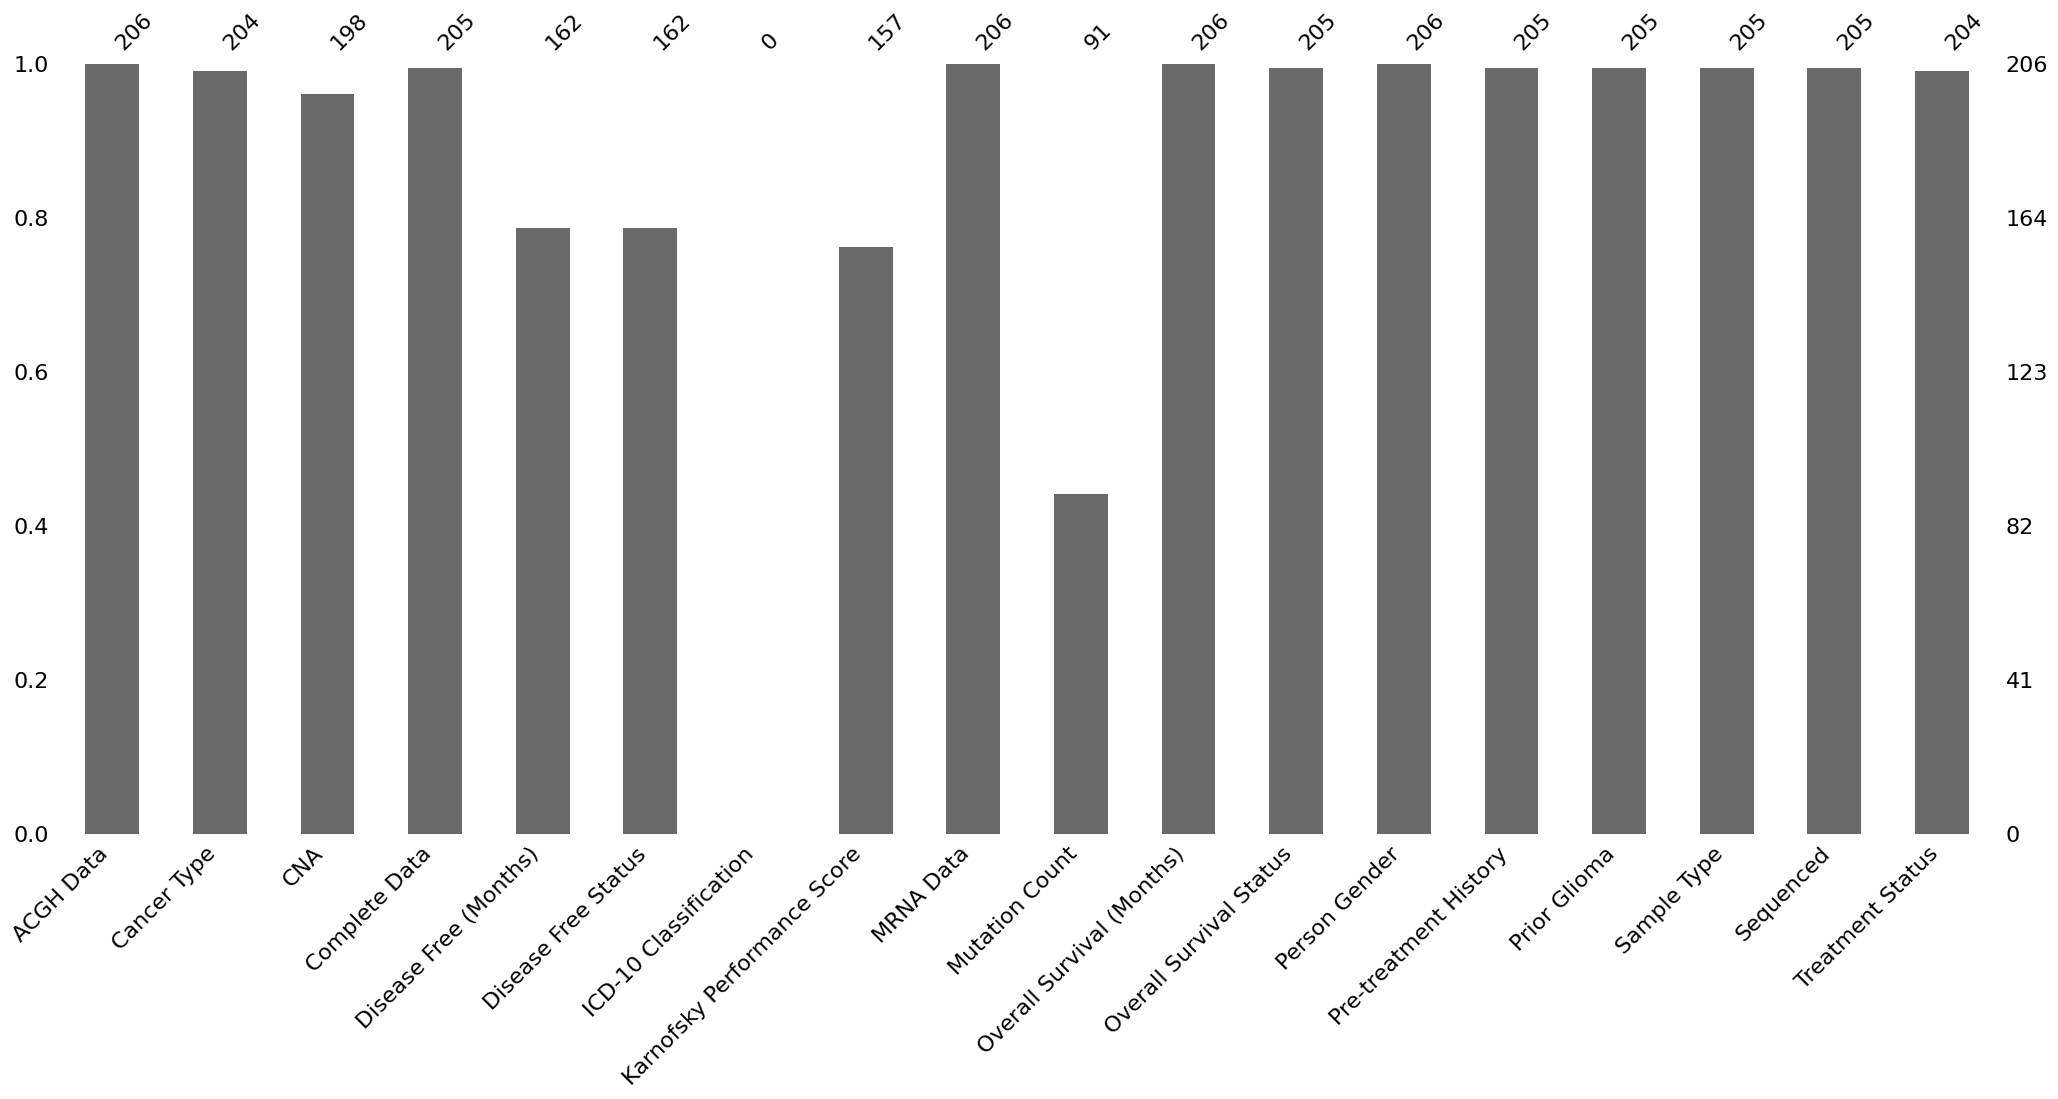

In [ ]:
msno.bar(df)

In [ ]:
profile = ProfileReport(df, title='Profiling Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.isnull().sum()

ACGH Data                        0
Cancer Type                      2
CNA                              8
Complete Data                    1
Disease Free (Months)           44
Disease Free Status             44
ICD-10 Classification          206
Karnofsky Performance Score     49
MRNA Data                        0
Mutation Count                 115
Overall Survival (Months)        0
Overall Survival Status          1
Person Gender                    0
Pre-treatment History            1
Prior Glioma                     1
Sample Type                      1
Sequenced                        1
Treatment Status                 2
dtype: int64

In [ ]:
df['Cancer Type'].fillna(df['Cancer Type'].mode().iloc[0], inplace=True)
df['CNA'].fillna(df['CNA'].mean(), inplace=True)
df['Complete Data'].fillna(df['Complete Data'].mode().iloc[0], inplace=True)
df['Disease Free (Months)'].fillna(df['Disease Free (Months)'].mean(), inplace=True)
df['Disease Free Status'].fillna(df['Disease Free Status'].mode().iloc[0], inplace=True)
del df['ICD-10 Classification']
df['Karnofsky Performance Score'].fillna(df['Karnofsky Performance Score'].median(), inplace=True)
df['Mutation Count'].fillna(df['Mutation Count'].median(), inplace=True)
df['Overall Survival Status'].fillna(df['Overall Survival Status'].mode().iloc[0], inplace=True)
df['Pre-treatment History'].fillna(df['Pre-treatment History'].mode().iloc[0], inplace=True)
df['Prior Glioma'].fillna(df['Prior Glioma'].mode().iloc[0], inplace=True)
df['Sample Type'].fillna(df['Sample Type'].mode().iloc[0], inplace=True)
df['Sequenced'].fillna(df['Sequenced'].mode().iloc[0], inplace=True)
df['Treatment Status'].fillna(df['Treatment Status'].mode().iloc[0], inplace=True)

In [ ]:
df.isnull().sum()

ACGH Data                      0
Cancer Type                    0
CNA                            0
Complete Data                  0
Disease Free (Months)          0
Disease Free Status            0
Karnofsky Performance Score    0
MRNA Data                      0
Mutation Count                 0
Overall Survival (Months)      0
Overall Survival Status        0
Person Gender                  0
Pre-treatment History          0
Prior Glioma                   0
Sample Type                    0
Sequenced                      0
Treatment Status               0
dtype: int64

In [ ]:
df.dtypes

ACGH Data                       object
Cancer Type                     object
CNA                            float64
Complete Data                   object
Disease Free (Months)          float64
Disease Free Status             object
Karnofsky Performance Score    float64
MRNA Data                       object
Mutation Count                 float64
Overall Survival (Months)      float64
Overall Survival Status         object
Person Gender                   object
Pre-treatment History           object
Prior Glioma                    object
Sample Type                     object
Sequenced                       object
Treatment Status                object
dtype: object

In [ ]:
le51 = LabelEncoder()
le52 = LabelEncoder()
le53 = LabelEncoder()
le54 = LabelEncoder()
le55 = LabelEncoder()
le56 = LabelEncoder()
le57 = LabelEncoder()
le58 = LabelEncoder()
le59 = LabelEncoder()
le510 = LabelEncoder()
le511 = LabelEncoder()
le512 = LabelEncoder()
df['acgh_data'] = le51.fit_transform(df['ACGH Data'])
df['cancer_type'] = le52.fit_transform(df['Cancer Type'])
df['complete_data'] = le53.fit_transform(df['Complete Data'])
df['d_free_status'] = le54.fit_transform(df['Disease Free Status'])
df['mrna_data'] = le55.fit_transform(df['MRNA Data'])
df['osurvival_status'] = le56.fit_transform(df['Overall Survival Status'])
df['p_gender'] = le57.fit_transform(df['Person Gender'])
df['ptreatment_history'] = le58.fit_transform(df['Pre-treatment History'])
df['prior_glioma'] = le59.fit_transform(df['Prior Glioma'])
df['sample_type'] = le510.fit_transform(df['Sample Type'])
df['sequenced'] = le511.fit_transform(df['Sequenced'])
df['treatment_status'] = le512.fit_transform(df['Treatment Status'])
dump(le51, 'le5_01.joblib')
dump(le52, 'le5_02.joblib')
dump(le53, 'le5_03.joblib')
dump(le54, 'le5_04.joblib')
dump(le55, 'le5_05.joblib')
dump(le56, 'le5_06_oss.joblib')
dump(le57, 'le5_07.joblib')
dump(le58, 'le5_08.joblib')
dump(le59, 'le5_09.joblib')
dump(le510, 'le5_10.joblib')
dump(le511, 'le5_11.joblib')
dump(le512, 'le5_12.joblib')

['le5_12.joblib']

In [ ]:
df.head()

,CNA,Concomitant Carcinoma in situ,Death due to disease,Diagnosis Age,Disease Free (Months),Disease Free Status,LN STATUS,Mutation Count,Neoadjuvant Chemotherapy,Overall Survival (Months),...,osurvival_status,p_histology,pt_stage,race_category,sample_type,sexo,smoking_status,surgical_treatment,tissue_sequenced,variant_histology
0,0.000041,No,NO,68.0,3.16,DiseaseFree,Negative,1,No,3.16,...,1,0,5,1,0,2,1,0,1,1
1,0.544000,Yes,NO,82.0,0.68,Recurred/Progressed,Negative,10,No,2.11,...,1,0,5,1,0,2,2,0,1,0
2,0.226000,No,NO,59.0,1.17,Recurred/Progressed,Negative,11,Yes,1.74,...,1,0,4,1,0,2,0,0,1,0
3,0.222000,Yes,YES,0.0,0.42,Recurred/Progressed,Positive,13,No,0.56,...,0,0,6,1,0,2,2,0,1,0
4,0.121000,Yes,YES,74.0,0.60,Recurred/Progressed,Negative,1,No,1.37,...,0,0,5,1,0,2,1,0,1,1


<ipython-input-62-fdf8fa3ad365>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


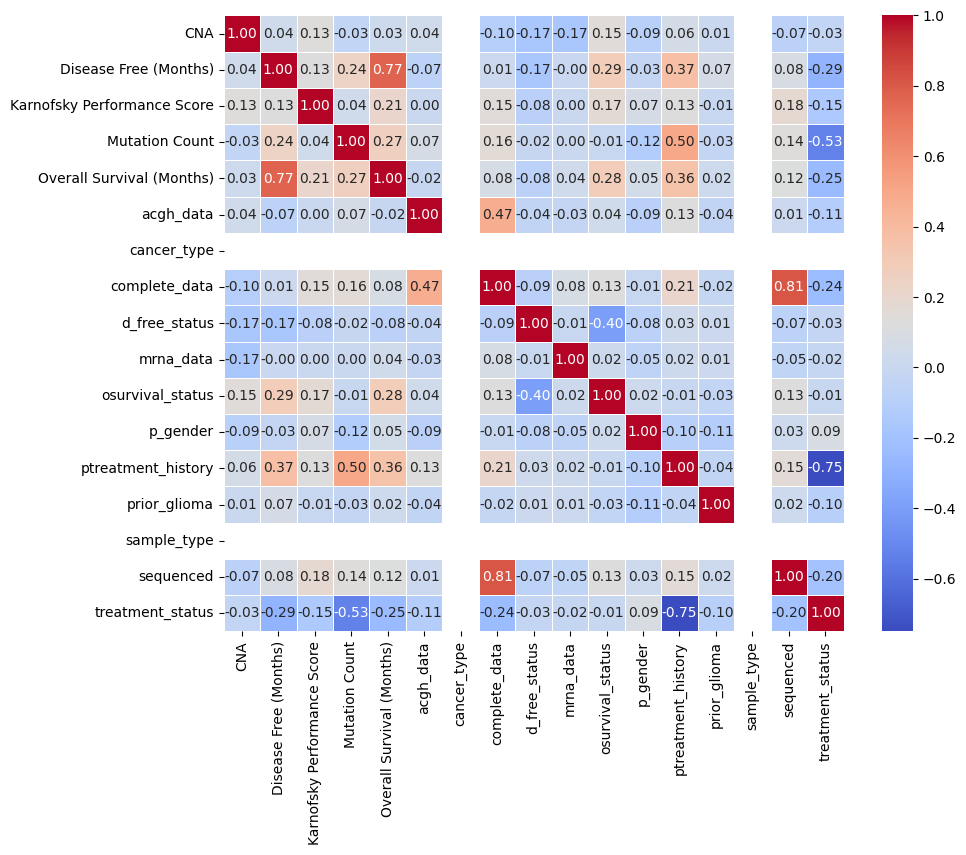

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax)
plt.show()

In [ ]:
umbral = 0.3
high_corr_features = (corr_matrix.abs() > umbral).sum()
high_corr_features = high_corr_features[high_corr_features > 1].index.tolist()

# Muestra las características con mayor correlación
print("Características con mayor correlación:")
print(high_corr_features)

Características con mayor correlación:
['Disease Free (Months)', 'Mutation Count', 'Overall Survival (Months)', 'acgh_data', 'complete_data', 'd_free_status', 'osurvival_status', 'ptreatment_history', 'sequenced', 'treatment_status']


In [ ]:
df['Cancer Type'].value_counts()

Glioblastoma Multiforme    206
Name: Cancer Type, dtype: int64

In [ ]:
df['Sample Type'].value_counts()

Primary    206
Name: Sample Type, dtype: int64

In [ ]:
features = ['Disease Free (Months)', 'Mutation Count', 'Overall Survival (Months)', 'acgh_data', 'complete_data', 'd_free_status', 'ptreatment_history', 'sequenced', 'treatment_status','Karnofsky Performance Score']
label = 'Overall Survival Status' # osurvival_status

In [ ]:
df[label].value_counts()

DECEASED    194
LIVING       12
Name: Overall Survival Status, dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df[features], df.osurvival_status, test_size=0.20, random_state=0, stratify=df.osurvival_status)

class_weights = len(ytrain) / (len(np.unique(ytrain)) * np.bincount(ytrain))
sample_weights = class_weights[ytrain]

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(len(ytrain))
print(len(ytest))

(164, 10)
(42, 10)
164
42


In [ ]:
ytrain.value_counts()

0    154
1     10
Name: osurvival_status, dtype: int64

# SVC Maquina de soporte vectorial

In [ ]:
svm = SVC(probability=True, class_weight='balanced')
modelo = svm.fit(xtrain, ytrain) # sample_weight=sample_weights
prediccion = modelo.predict(xtest)

In [ ]:
prediccion
# ytest = prediccion
prediccion_list = prediccion.tolist()
ytest_lista = ytest.tolist()
i = 0
for p in prediccion_list:
  print(p, ytest_lista[i])
  i += 1

DECEASED    194
LIVING       12
Name: Overall Survival Status, dtype: int64

score:  0.9047619047619048
recall_score:  0.9047619047619048
accuracy_score:  0.9047619047619048
f1_score:  0.9047619047619048

classification_report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        36
           1       1.00      0.33      0.50         6

    accuracy                           0.90        42
   macro avg       0.95      0.67      0.72        42
weighted avg       0.91      0.90      0.88        42



<Axes: >

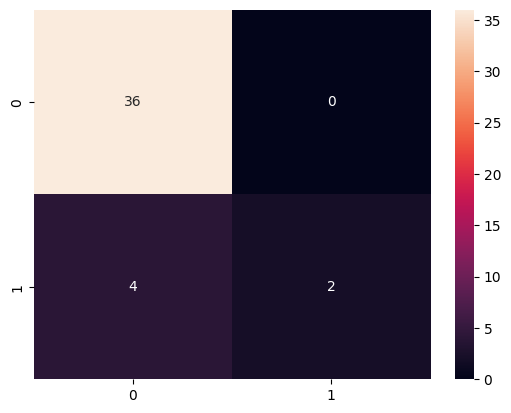

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print()
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

In [ ]:
data = {'Age At Procurement':70.5,	'Mutation Count':201.2,	'ms':8,	'pg':0, 'pts':2, 'st':1, 'ss':9, 'tss':0}

p = pd.DataFrame(data, index=[0])
npm = modelo.predict(p)
le5_06.inverse_transform(npm.tolist())
# datadrif si alucina

array(['sun-exposed'], dtype=object)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=100, class_weight='balanced')
modelo.fit(xtrain, ytrain) #sample_weight=sample_weights
prediccion = modelo.predict(xtest)

DECEASED    194
LIVING       12
Name: Overall Survival Status, dtype: int64

score:  0.9761904761904762
recall_score:  0.9761904761904762
accuracy_score:  0.9761904761904762
f1_score:  0.9761904761904762

classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.50      1.00      0.67         1

    accuracy                           0.98        42
   macro avg       0.75      0.99      0.83        42
weighted avg       0.99      0.98      0.98        42



<Axes: >

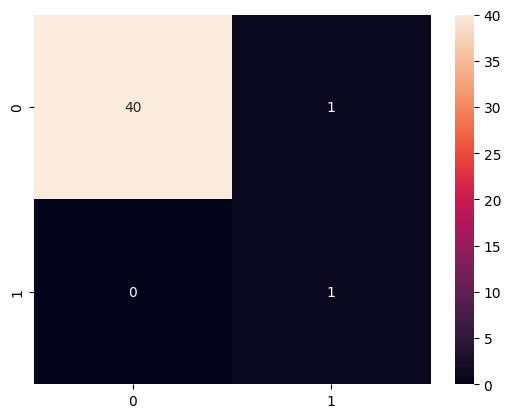

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print()
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

## Arboles de decicion

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import Image
import pydotplus

In [ ]:
dtc = DecisionTreeClassifier(max_depth=6, class_weight='balanced')
modelo = dtc.fit(xtrain, ytrain) # sample_weight=sample_weights
prediccion = modelo.predict(xtest)

In [ ]:
# ytest = prediccion
prediccion_list = prediccion.tolist()
ytest_lista = ytest.tolist()
i = 0
for p in prediccion_list:
  print(p, ytest_lista[i])
  i += 1

DECEASED    194
LIVING       12
Name: Overall Survival Status, dtype: int64

score:  0.9523809523809523
recall_score:  0.9523809523809523
accuracy_score:  0.9523809523809523
f1_score:  0.9523809523809523
classification_report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.50      0.67         4

    accuracy                           0.95        42
   macro avg       0.97      0.75      0.82        42
weighted avg       0.95      0.95      0.95        42



<Axes: >

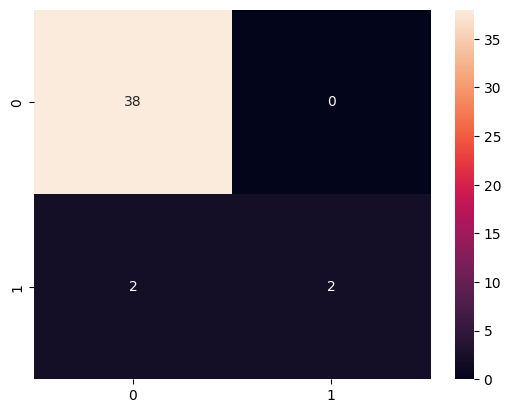

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

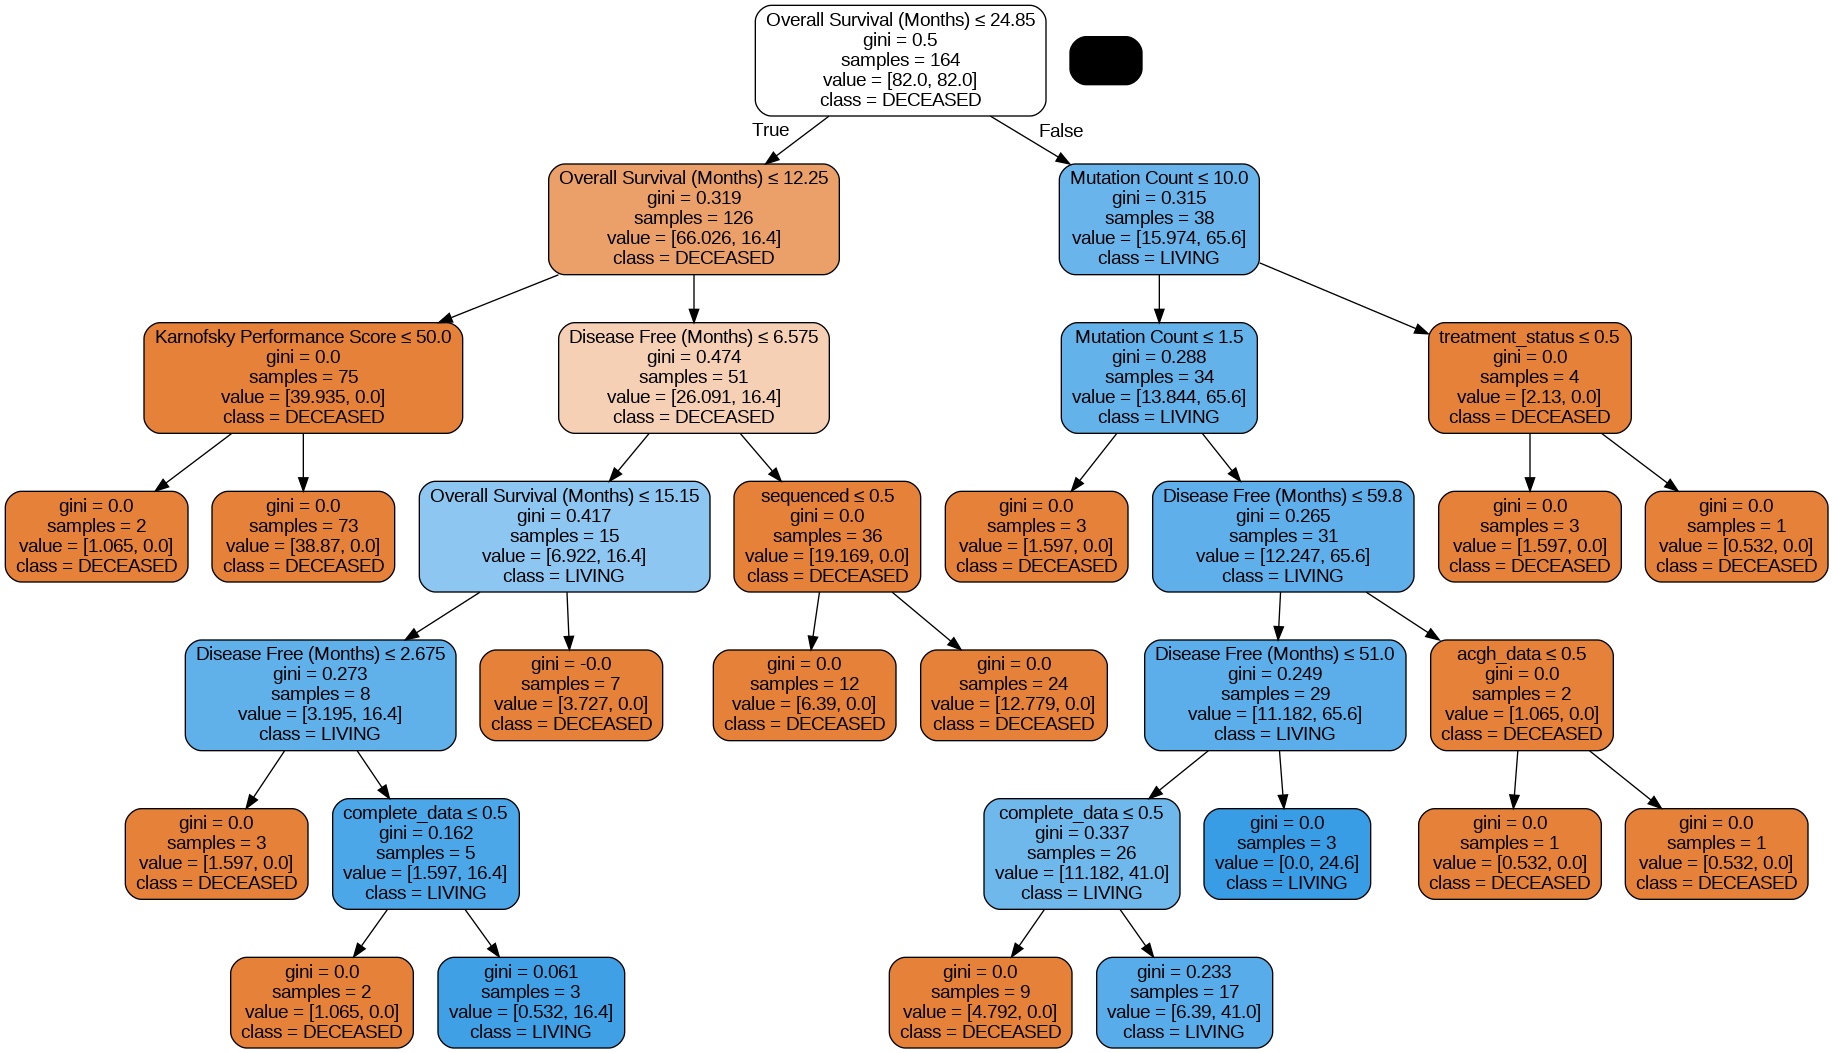

In [ ]:
dot_data = export_graphviz(modelo, out_file=None, feature_names=features, class_names=df[label].unique(), filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
modelo = gbc.fit(xtrain, ytrain, sample_weight=sample_weights)
prediccion = modelo.predict(xtest)
dump(modelo,'modelo5.joblib')

['modelo4.joblib']

DECEASED    194
LIVING       12
Name: Overall Survival Status, dtype: int64

score:  1.0
recall_score:  1.0
accuracy_score:  1.0
f1_score:  1.0
classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00         2

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



<Axes: >

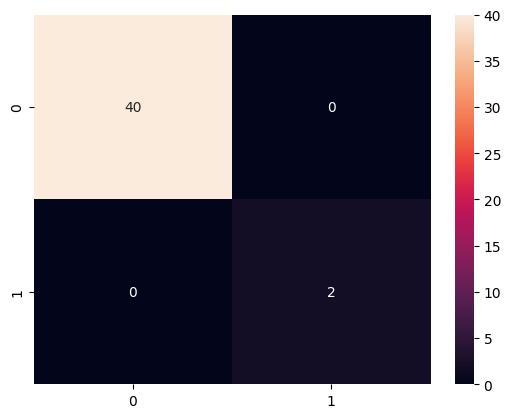

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()
modelo.fit(xtrain, ytrain, sample_weight=sample_weights)
prediccion = modelo.predict(xtest)

DECEASED    194
LIVING       12
Name: Overall Survival Status, dtype: int64

score:  0.9761904761904762
recall_score:  0.9761904761904762
accuracy_score:  0.9761904761904762
f1_score:  0.9761904761904762
classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.50      1.00      0.67         1

    accuracy                           0.98        42
   macro avg       0.75      0.99      0.83        42
weighted avg       0.99      0.98      0.98        42



<Axes: >

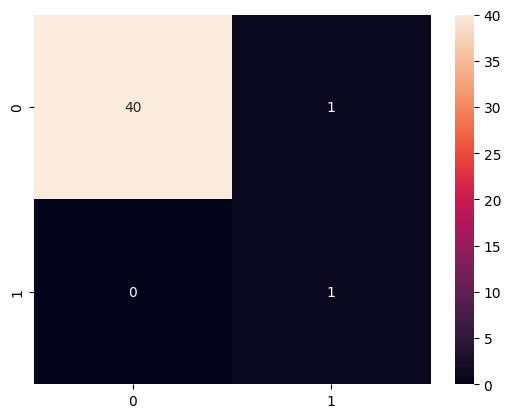

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

|    recall    |   SVC     | randomForest | DecisionTree |GradientBoosting|naive bayes|
|--------------|-----------|--------------|--------------|----------------|-----------|
|       0      |   1.00    |     0.98     |    1.00      |     1.00       |   0.98         |   
|       1      |   0.33    |     1.00     |    0.50      |     1.00       |   1.00         |
|   accuracy   |   0.90    |     0.98     |    0.95      |     1.00       |   0.98         |


El mejor clasificador fue Gradient Boosting con 1.00 de accuracy y sus parametros en recall estan normalizadas, por eso lo elegi